In [1]:
import numpy as np
import pandas as pd
import json
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime, timedelta
import matplotlib.dates as dates

In [2]:
import uncertainties.unumpy as unp
import uncertainties as unc

### Functions

In [3]:
def powerlaw(x, amplitude, exponent):
    return amplitude * x**(exponent)

In [4]:
def exponential(x, amplitude, tau):
    return amplitude * np.exp(x/tau)

In [5]:
def gauss(x, amplitude, mean, sigma):
    return amplitude*np.exp(-(x-mean)**2/(2*sigma**2))

### Import

In [6]:
dfr = pd.read_json('../dati-json/dpc-covid19-ita-regioni.json')
dfp = pd.read_json('../dati-json/dpc-covid19-ita-province.json')
df = pd.read_json('../dati-json/dpc-covid19-ita-andamento-nazionale.json')

In [7]:
#dfp[dfp.denominazione_provincia == 'Bergamo'].tail()

In [8]:
df.tail()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
12,2020-03-07 18:00:00,ITA,2651,567,3218,1843,5061,1145,589,233,5883,42062
13,2020-03-08 18:00:00,ITA,3557,650,4207,2180,6387,1326,622,366,7375,49937
14,2020-03-09 18:00:00,ITA,4316,733,5049,2936,7985,1598,724,463,9172,53826
15,2020-03-10 18:00:00,ITA,5038,877,5915,2599,8514,529,1004,631,10149,60761
16,2020-03-11 17:00:00,ITA,5838,1028,6866,3724,10590,2076,1045,827,12462,73154


# ITALIA

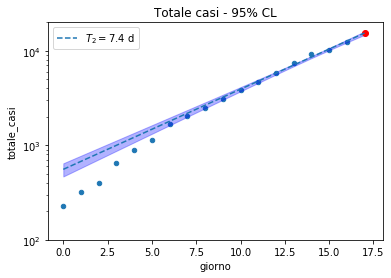

In [9]:
fig, ax = plt.subplots()

x = np.arange(len(df))
px = np.arange(len(df)*2)
dd = 6

df.reset_index().plot.scatter(x='index',y='totale_casi', ax = ax, logy = True, title = 'Totale casi - 95% CL', ylim=[10**2,2*10**4])

popt, pcov = optimize.curve_fit(exponential, x[dd:], df.totale_casi[dd:])

y0,tau = unc.correlated_values(popt, pcov)
px = px[:18]
py = y0*unp.exp(px/tau)
nom = unp.nominal_values(py)
std = unp.std_devs(py)

ax.fill_between(px, nom + 1.96 * std, nom - 1.96 * std, alpha = 0.3, color = 'blue')

label = r'$T_2=$'+str(round(popt[1]/np.log(2),1))+ r' d'
ax.plot(px[:18],exponential(px[:18], *popt), ls = '--', label = label)

ax.scatter(17, exponential(17, *popt), color = 'red')
#ax.scatter(16,12462, color = 'red', label = 'today')

ax.set_xlabel('giorno')
ax.legend()
fig.savefig('plot/totale_casi.png', dpi = 300)

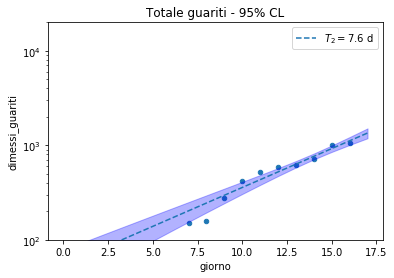

In [134]:
fig, ax = plt.subplots()

x = np.arange(len(df))
px = np.arange(len(df)*2)
dd = 6

df.reset_index().plot.scatter(x='index',y='dimessi_guariti', ax = ax, logy = True, title = 'Totale guariti - 95% CL', ylim=[10**2,2*10**4])

popt, pcov = optimize.curve_fit(exponential, x[dd:], df.dimessi_guariti[dd:])

y0,tau = unc.correlated_values(popt, pcov)
px = px[:18]
py = y0*unp.exp(px/tau)
nom = unp.nominal_values(py)
std = unp.std_devs(py)

ax.fill_between(px, nom + 1.96 * std, nom - 1.96 * std, alpha = 0.3, color = 'blue')

label = r'$T_2=$'+str(round(popt[1]/np.log(2),1))+ r' d'
ax.plot(px[:18],exponential(px[:18], *popt), ls = '--', label = label)

#ax.scatter(17, exponential(17, *popt), color = 'red')
#ax.scatter(16,12462, color = 'red', label = 'today')

ax.set_xlabel('giorno')
ax.legend()
fig.savefig('plot/totale_guariti.png', dpi = 300)

In [10]:
exponential(17, *popt)

15408.661482946965

# Province

## Singola Provincia

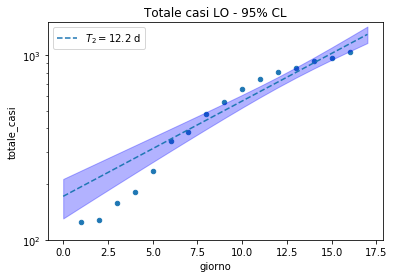

In [11]:
provincia = 'LO'

fig, ax = plt.subplots()

x = np.arange(17)
px = np.arange(18)
dd = 1

dfp[dfp.sigla_provincia == provincia].reset_index().reset_index().plot.scatter(x='level_0',y='totale_casi', ax = ax, logy = True, title = 'Totale casi {} - 95% CL'.format(provincia), ylim=[10**2,1.5*10**3])

popt, pcov = optimize.curve_fit(exponential, x[dd:], dfp[dfp.sigla_provincia == provincia].totale_casi[dd:])
y0,tau = unc.correlated_values(popt, pcov)
px = px[:18]
py = y0*unp.exp(px/tau)
nom = unp.nominal_values(py)
std = unp.std_devs(py)

ax.fill_between(px, nom + 1.96 * std, nom - 1.96 * std, alpha = 0.3, color = 'blue')

label = r'$T_2=$'+str(round(popt[1]/np.log(2),1))+ r' d'
ax.plot(px[:18],exponential(px[:18], *popt), ls = '--', label = label)

#poptg, pcovg = optimize.curve_fit(gauss, x[:], dfp[dfp.sigla_provincia == provincia].totale_casi[:], p0=[1000,20,7])
#ax.plot(px[:16],gauss(px[:16], *poptg), ls = '--', label = 'gauss', color = 'red')

#ax.scatter(14, exponential(14, *popt), color = 'red')

ax.set_xlabel('giorno')
ax.legend()
fig.savefig('plot/totale_casi_{}.png'.format(provincia), dpi = 300)

In [25]:
dfp[dfp.sigla_provincia == provincia].to_csv('filename.csv')

## Analisi Province

In [7]:
province = np.unique(dfp[dfp.sigla_provincia != ''].sigla_provincia.values)

In [8]:
dfp['data'] = pd.to_datetime(dfp['data'])
time = max(dfp.loc[:,'data'].values) + np.timedelta64(1,'D')

df_forecast = dfp[(dfp.data == max(dfp.data.values)) & (dfp.sigla_provincia != '')]
df_forecast.loc[:,'data'] = time
sLength = len(df_forecast['data'])
df_forecast = df_forecast.assign(std = np.zeros(sLength))
#df_forecast.head()

/Users/Emanuele/jupyter_venv/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
for pr in province:
    df_temp = dfp[dfp.sigla_provincia == pr]
    #df_temp.loc[:,'data'] = pd.to_datetime(df_temp.loc[:,'data'])
    df_temp.loc[:,'data'] = df_temp.loc[:,'data'].apply(lambda x: x.dayofyear)
    #df_temp.loc[:,'data'].apply(lambda x: x.dayofyear)
    
    try:
        x = df_temp[df_temp.totale_casi > 0].data.values - min(df_temp[df_temp.totale_casi > 0].data.values)
        #x = df_temp[df_temp.totale_casi > 0].giorno.values
        if pr == 'BG':
            print(type(x[0]))
        #x -= min(x)
        y = df_temp[df_temp.totale_casi > 0].totale_casi.values
        popt, pcov = optimize.curve_fit(exponential, x, y)

        y0,tau = unc.correlated_values(popt, pcov)
        py = y0*unp.exp((max(x)+1)/tau)

        nom = py.nominal_value
        std_new = py.std_dev
    except:
        nom = 0
        std_new = 0
    
    df_forecast.loc[df_forecast.sigla_provincia == pr,['totale_casi','std']] = nom, std_new
    
    

/Users/Emanuele/jupyter_venv/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/Emanuele/jupyter_venv/lib/python3.7/site-packages/uncertainties/core.py:178: RuntimeWarning: invalid value encountered in true_divide
  covariance_mat/norm_vector/norm_vector[:,numpy.newaxis],
/Users/Emanuele/jupyter_venv/lib/python3.7/site-packages/uncertainties/core.py:227: RuntimeWarning: invalid value encountered in less
  variances[variances < 0] = 0.


<class 'numpy.int64'>


In [10]:
df_forecast.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,std
2176,2020-03-13 17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,25.919358,3.360677
2177,2020-03-13 17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,11.294535,1.551595
2178,2020-03-13 17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,75.751200,10.328659
2179,2020-03-13 17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,6.853764,0.887385
2181,2020-03-13 17:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,4.024506,0.678436


In [11]:
df_forecast.to_csv('forecast_province_2020.03.13.csv')

### Lombardia

In [12]:
regione = 'Lombardia'

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

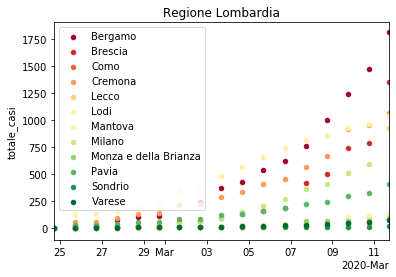

In [137]:
fig, ax = plt.subplots()

province = df_forecast[df_forecast.denominazione_regione == regione].denominazione_provincia.values
day0, day1 = min(dfp.data.values), max(dfp.data.values)

#ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0,1,2,3,4,5,6),
                                              #  interval=1))
#ax.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
#ax.xaxis.grid(True, which="minor")
#ax.yaxis.grid()
#ax.xaxis.set_major_locator(dates.MonthLocator())
#ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

locator = dates.AutoDateLocator(minticks=7, maxticks=10)
formatter = dates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

#for pr in province:
 #   dfp[dfp.denominazione_provincia == pr].plot.scatter(x='data', y='totale_casi', 
  #                              ax = ax, title = 'Totale casi '+pr, xlim = [day0, day1], x_compat=True)

colors = cm.RdYlGn(np.linspace(0,1,len(province)))

for index,pr in enumerate(province):
    dfp[dfp.denominazione_provincia == pr].plot.scatter(x='data', y='totale_casi', label = pr,
                              ax = ax, title = 'Totale casi '+pr, xlim = [day0, day1], color = colors[index])

ax.set_xlabel('')
ax.set_title('Regione ' + regione)

plt.show()

In [138]:
df_forecast.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,std
2048,2020-03-12 17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,12.495497,1.255968
2049,2020-03-12 17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,9.435110,1.762833
2050,2020-03-12 17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,29.898483,4.959814
2051,2020-03-12 17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,5.450120,0.772605
2053,2020-03-12 17:00:00,ITA,17,Basilicata,77,Matera,MT,40.667512,16.597924,4.176827,0.737628


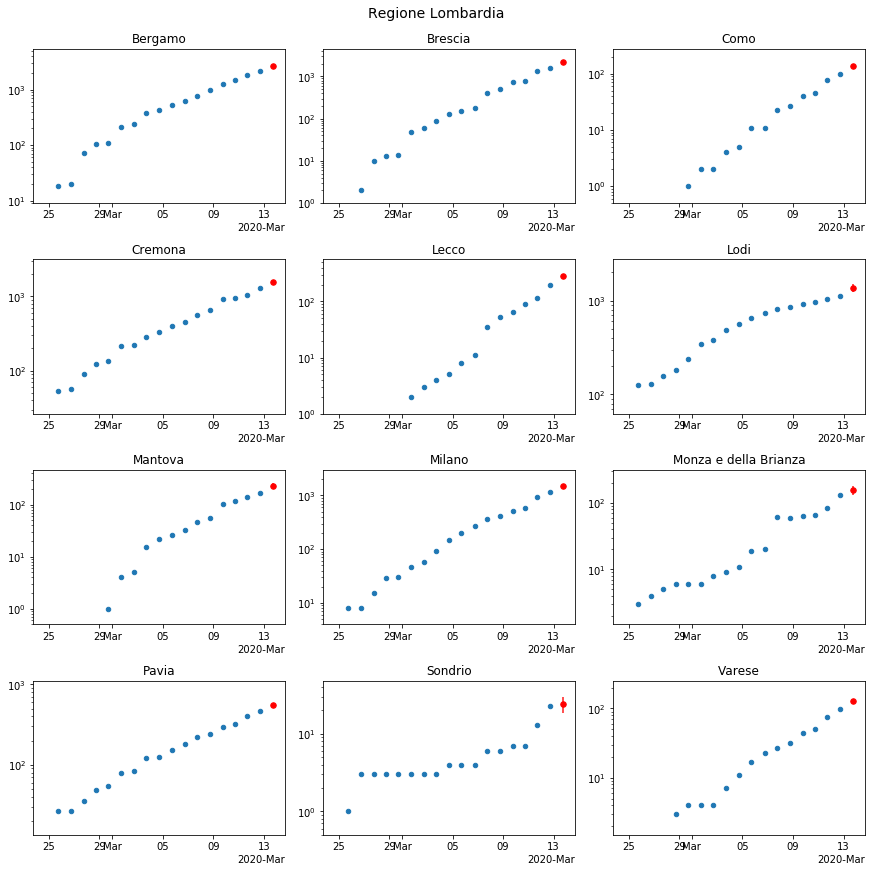

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12), constrained_layout=True)
province = df_forecast[df_forecast.denominazione_regione == regione].denominazione_provincia.values
day0, day1 = min(dfp.data.values) - np.timedelta64(1,'D'), max(dfp.data.values) + np.timedelta64(2,'D')

for pr, ax in zip(province, axes.flat):
    x = df_forecast[df_forecast.denominazione_provincia == pr].data.values
    y = df_forecast[df_forecast.denominazione_provincia == pr].totale_casi.values
    yerr = 1.96*df_forecast[df_forecast.denominazione_provincia == pr]['std']
    ax.scatter(x,y, color = 'red', s = 30)
    ax.errorbar(x,y,yerr, color = 'red', alpha = 0.9)
    
    dfp[dfp.denominazione_provincia == pr].plot.scatter(x='data', y='totale_casi', ax = ax, title = pr, xlim =[day0,day1])
    locator = dates.AutoDateLocator(minticks=7, maxticks=10)
    formatter = dates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yscale('log')
    ax.set_ylim(0.5*max(1,min(dfp[(dfp.denominazione_provincia == pr) & (dfp.totale_casi>0)].totale_casi)),2*y)
    
fig.suptitle('Regione ' + regione, size = 14)
fig.savefig('plot/Regione_'+regione+str(max(dfp.data.values))+'.png', dpi = 200)

### FVG

In [14]:
regione = 'Friuli Venezia Giulia'

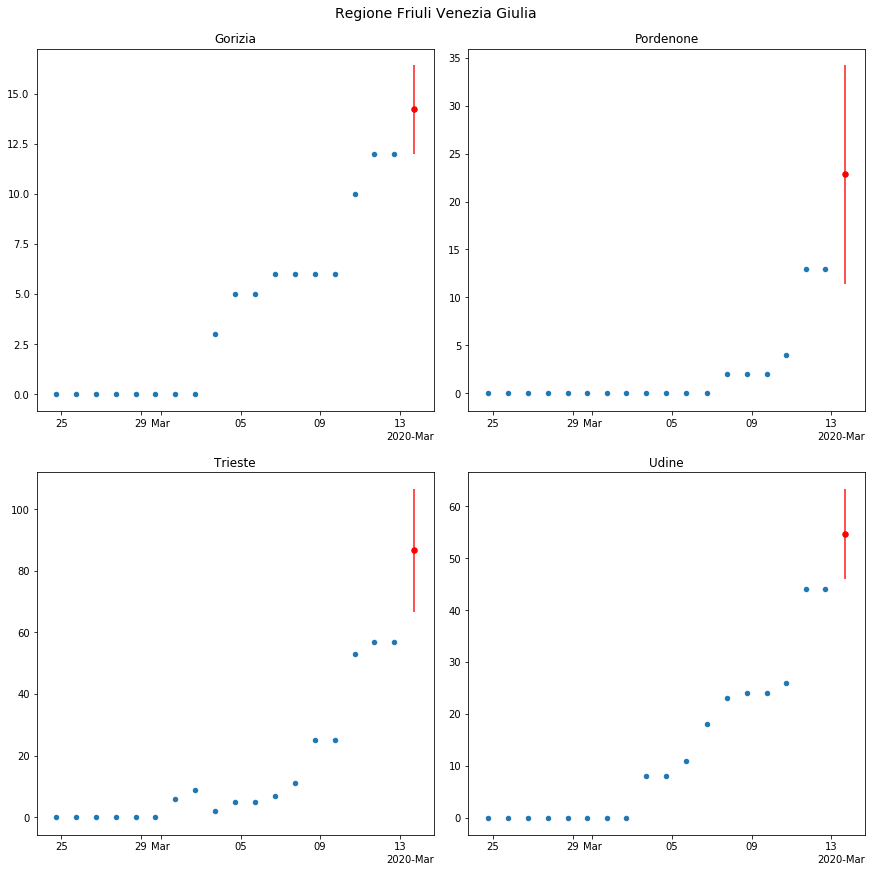

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), constrained_layout=True)
province = df_forecast[df_forecast.denominazione_regione == regione].denominazione_provincia.values
day0, day1 = min(dfp.data.values) - np.timedelta64(1,'D'), max(dfp.data.values) + np.timedelta64(2,'D')

for pr, ax in zip(province, axes.flat):
    x = df_forecast[df_forecast.denominazione_provincia == pr].data.values
    y = df_forecast[df_forecast.denominazione_provincia == pr].totale_casi.values
    yerr = 1.96*df_forecast[df_forecast.denominazione_provincia == pr]['std']
    ax.scatter(x,y, color = 'red', s = 30)
    ax.errorbar(x,y,yerr, color = 'red', alpha = 0.9)
    
    dfp[dfp.denominazione_provincia == pr].plot.scatter(x='data', y='totale_casi', ax = ax, title = pr, xlim =[day0,day1])
    locator = dates.AutoDateLocator(minticks=5, maxticks=7)
    formatter = dates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('Regione ' + regione, size = 14)
fig.savefig('plot/Regione_'+regione+str(max(dfp.data.values))+'.png', dpi = 200)

### Veneto

In [16]:
regione = 'Veneto'

['Belluno' 'Padova' 'Rovigo' 'Treviso' 'Venezia' 'Verona' 'Vicenza']


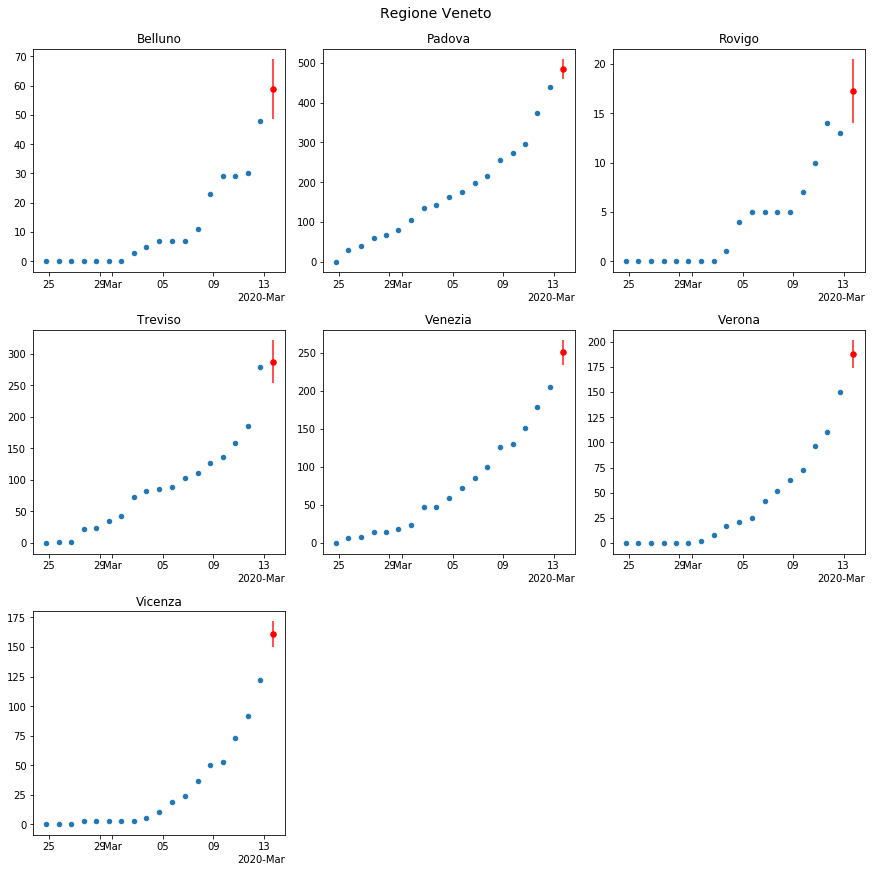

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), constrained_layout=True)
province = df_forecast[df_forecast.denominazione_regione == regione].denominazione_provincia.values
print (province)
day0, day1 = min(dfp.data.values) - np.timedelta64(1,'D'), max(dfp.data.values) + np.timedelta64(2,'D')

for pr, ax in zip(province, axes.flat):
    x = df_forecast[df_forecast.denominazione_provincia == pr].data.values
    y = df_forecast[df_forecast.denominazione_provincia == pr].totale_casi.values
    yerr = 1.96*df_forecast[df_forecast.denominazione_provincia == pr]['std']
    ax.scatter(x,y, color = 'red', s = 30)
    ax.errorbar(x,y,yerr, color = 'red', alpha = 0.9)
    
    dfp[dfp.denominazione_provincia == pr].plot.scatter(x='data', y='totale_casi', ax = ax, title = pr, xlim =[day0,day1])
    locator = dates.AutoDateLocator(minticks=5, maxticks=7)
    formatter = dates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('Regione ' + regione, size = 14)
fig.delaxes(axes[2][2])
fig.delaxes(axes[2][1])
fig.savefig('plot/Regione_'+regione+str(max(dfp.data.values))+'.png', dpi = 200)

In [19]:
regioni = np.unique(dfp[dfp.denominazione_regione != ''].denominazione_regione.values)

In [ ]:
for reg in regioni:
    province = df_forecast[df_forecast.denominazione_regione == reg].denominazione_provincia.values
    if len(province)>4:
        col = 3
    elif len(province)>2:
        col = 2
    else: 
        col = 1
    row = int(len(province)/col) + (len(province)%col > 0) 
    
    fig, axes = plt.subplots(nrows=row, ncols=col, figsize=(12, 12), constrained_layout=True)
    day0, day1 = min(dfp.data.values) - np.timedelta64(1,'D'), max(dfp.data.values) + np.timedelta64(2,'D')

    if len(province)>1:
        for pr, ax in zip(province, axes.flat):
            x = df_forecast[df_forecast.denominazione_provincia == pr].data.values
            y = df_forecast[df_forecast.denominazione_provincia == pr].totale_casi.values
            yerr = 1.96*df_forecast[df_forecast.denominazione_provincia == pr]['std']
            ax.scatter(x,y, color = 'red', s = 30)
            ax.errorbar(x,y,yerr, color = 'red', alpha = 0.9)

            dfp[dfp.denominazione_provincia == pr].plot.scatter(x='data', y='totale_casi', ax = ax, title = pr, xlim =[day0,day1])
            locator = dates.AutoDateLocator(minticks=5, maxticks=7)
            formatter = dates.ConciseDateFormatter(locator)
            ax.xaxis.set_major_locator(locator)
            ax.xaxis.set_major_formatter(formatter)
            ax.set_xlabel('')
            ax.set_ylabel('')
    else:
        x = df_forecast[df_forecast.denominazione_provincia == pr].data.values
        y = df_forecast[df_forecast.denominazione_provincia == pr].totale_casi.values
        yerr = 1.96*df_forecast[df_forecast.denominazione_provincia == pr]['std']
        axes.scatter(x,y, color = 'red', s = 30)
        axes.errorbar(x,y,yerr, color = 'red', alpha = 0.9)

        dfp[dfp.denominazione_provincia == pr].plot.scatter(x='data', y='totale_casi', ax = axes, title = pr, xlim =[day0,day1])
        locator = dates.AutoDateLocator(minticks=5, maxticks=7)
        formatter = dates.ConciseDateFormatter(locator)
        axes.xaxis.set_major_locator(locator)
        axes.xaxis.set_major_formatter(formatter)
        axes.set_xlabel('')
        axes.set_ylabel('')
        
    fig.suptitle('Regione ' + reg, size = 14)
    for i in range(len(province),row*col):
        fig.delaxes(axes.flat[i])
    fig.savefig('plot/Regione_'+reg+'_'+str(max(dfp.data.values))+'.png', dpi = 200)

In [22]:
for i in range(0): print(i)